Import the necessary libraries.
Read a CSV file (Churn_Modelling.csv) into a DataFrame (df).

In [1]:
import pandas as pd
df = pd.read_csv('archive/Churn_Modelling.csv')

Display the first few rows of the DataFrame (df) using head().

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Remove unnecessary columns (RowNumber, CustomerId, Surname) from the DataFrame (df) using drop().

In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Specify the columns to be scaled (CreditScore, Tenure, Balance, EstimatedSalary, NumOfProducts).

In [5]:
cols_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

Use MinMaxScaler() from scikit-learn to scale the specified columns (cols_to_scale) in the DataFrame (df).

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [7]:
df[cols_to_scale] = scale.fit_transform(df[cols_to_scale])

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,42,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,41,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,Female,42,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,Female,39,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,Female,43,0.2,0.500246,0.000000,1,1,0.395400,0


In [9]:
df.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df['Age'].max()

92

Create new columns based on age ranges by setting conditions and using np.where().

In [11]:
import numpy as np

condition = df['Age'] > 30
condition1 = (df['Age'] >= 30) & (df['Age'] <= 59)
condition2 = df['Age'] >= 60

df['YoungAdults'] = np.where(condition, '0', '1')
df['MiddleAged'] = np.where(condition1, '1', '0')
df['OldAged'] = np.where(condition2, '1', '0')

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,YoungAdults,MiddleAged,OldAged
0,0.538,France,Female,42,0.2,0.000000,0.000000,1,1,0.506735,1,0,1,0
1,0.516,Spain,Female,41,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,France,Female,42,0.8,0.636357,0.666667,1,0,0.569654,1,0,1,0
3,0.698,France,Female,39,0.1,0.000000,0.333333,0,0,0.469120,0,0,1,0
4,1.000,Spain,Female,43,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Remove the 'Age' column from the DataFrame (df).

In [13]:
df.drop(['Age'], axis='columns', inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,YoungAdults,MiddleAged,OldAged
0,0.538,France,Female,0.2,0.000000,0.000000,1,1,0.506735,1,0,1,0
1,0.516,Spain,Female,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,France,Female,0.8,0.636357,0.666667,1,0,0.569654,1,0,1,0
3,0.698,France,Female,0.1,0.000000,0.333333,0,0,0.469120,0,0,1,0
4,1.000,Spain,Female,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


Replace the values in the 'Gender' column with numeric values ('Female' with 1 and 'Male' with 0).

In [15]:
df.replace({'Female': 1, 'Male': 0}, inplace=True)

In [16]:
df.head

<bound method NDFrame.head of       CreditScore Geography  Gender  Tenure   Balance  NumOfProducts  \
0           0.538    France       1     0.2  0.000000       0.000000   
1           0.516     Spain       1     0.1  0.334031       0.000000   
2           0.304    France       1     0.8  0.636357       0.666667   
3           0.698    France       1     0.1  0.000000       0.333333   
4           1.000     Spain       1     0.2  0.500246       0.000000   
...           ...       ...     ...     ...       ...            ...   
9995        0.842    France       0     0.5  0.000000       0.333333   
9996        0.332    France       0     1.0  0.228657       0.000000   
9997        0.718    France       1     0.7  0.000000       0.000000   
9998        0.844   Germany       0     0.3  0.299226       0.333333   
9999        0.884    France       1     0.4  0.518708       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited YoungAdults  \
0             1               1  

In [17]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,YoungAdults,MiddleAged,OldAged
0,0.538,France,1,0.2,0.000000,0.000000,1,1,0.506735,1,0,1,0
1,0.516,Spain,1,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,France,1,0.8,0.636357,0.666667,1,0,0.569654,1,0,1,0
3,0.698,France,1,0.1,0.000000,0.333333,0,0,0.469120,0,0,1,0
4,1.000,Spain,1,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


Perform one-hot encoding on the 'Geography' column using get_dummies().
Create new columns for each unique value in the column.

In [18]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [19]:
df1.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,YoungAdults,MiddleAged,OldAged,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.2,0.000000,0.000000,1,1,0.506735,1,0,1,0,1,0,0
1,0.516,1,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0,0,0,1
2,0.304,1,0.8,0.636357,0.666667,1,0,0.569654,1,0,1,0,1,0,0
3,0.698,1,0.1,0.000000,0.333333,0,0,0.469120,0,0,1,0,1,0,0
4,1.000,1,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0,0,0,1


In [20]:
df1.dtypes

CreditScore          float64
Gender                 int64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
YoungAdults           object
MiddleAged            object
OldAged               object
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

Convert three columns ('YoungAdults', 'MiddleAged', 'OldAged') to the integer data type.

In [21]:
df1[['YoungAdults', 'MiddleAged', 'OldAged']] = df1[['YoungAdults', 'MiddleAged', 'OldAged']].astype(int)

In [22]:
len(df1.columns)

15

Split the data into features (X) and the target variable (y).
Split the data into training and testing sets using train_test_split().

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=5)

Define a sequential model using Keras.
Add two dense layers to the model, specifying the number of units and activation functions.
Compile the model with the optimizer, loss function, and metrics.
Fit the model to the training data for a specified number of epochs.

In [26]:
import tensorflow as tf
from tensorflow import keras

# Define your model architecture
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(14,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 2ms/step - loss: 0.5915 - accuracy: 0.7025
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7960
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7968
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8006
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8012
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8044
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8070
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8086
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8102
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8131

Evaluate the trained model on the testing data and get the loss value and metrics.

In [27]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8085


[0.43160754442214966, 0.8084999918937683]

Make predictions on the testing data using the trained model.

In [28]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 989us/step


Convert the predicted probabilities to binary predictions based on a threshold of 0.5.

In [29]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Generate a classification report to evaluate the model's performance on the testing data.

In [32]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.60      0.17      0.26       405

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.78      0.81      0.76      2000



Create a confusion matrix using the true labels and predicted labels.
Visualize the confusion matrix using a heatmap.

Text(69.0, 0.5, 'Truth')

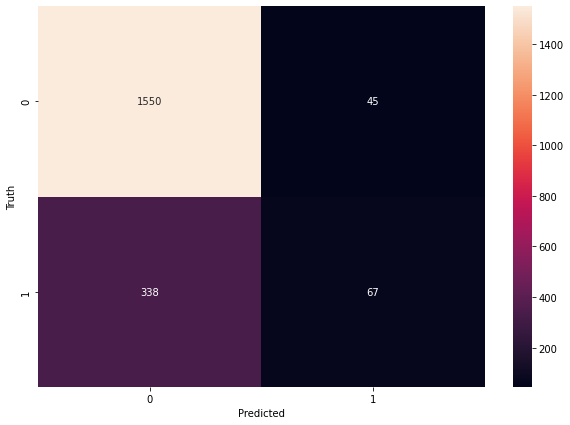

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Manually calculate the accuracy of the model using the counts of true positives, true negatives, false positives, and false negatives.

In [34]:
accurate = round((1584+32)/(1584+32+373+11) * 100, 2)
print(accurate)

80.8
